In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [2]:
data_path = 'data.csv'
data = pd.read_csv(data_path)

In [3]:
X = data.drop(columns=['verification.time'])
y = data['verification.time']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
models = {
    'Linear Regression': LinearRegression(),
    'SVR (Linear)': SVR(kernel='linear'),
    'SVR (Poly)': SVR(kernel='poly', degree=3),
    'SVR (RBF)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [7]:
scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    scores[name] = model.score(X_test_scaled, y_test)

In [11]:
print("\nModel Performance on Test Data")
print("=" * 35)

for name, score in scores.items():
    print(f"{name:<20} | R² = {score:.4f}")

print("-" * 35)


Model Performance on Test Data
Linear Regression    | R² = 0.3800
SVR (Linear)         | R² = -0.1927
SVR (Poly)           | R² = -0.3035
SVR (RBF)            | R² = -0.3004
Decision Tree        | R² = 0.9889
Random Forest        | R² = 0.9936
AdaBoost             | R² = 0.9534
Gradient Boosting    | R² = 0.9783
-----------------------------------


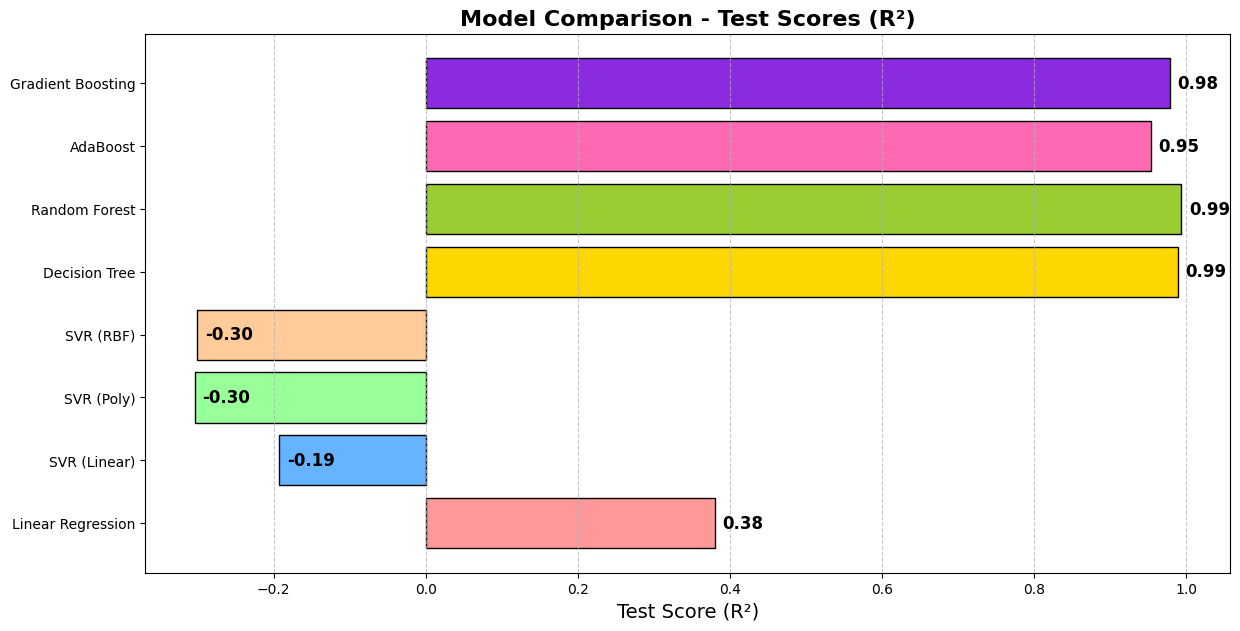

In [9]:
model_names = list(scores.keys())
test_scores = list(scores.values())

# Colors for the bars
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#9ACD32', '#FF69B4', '#8A2BE2']

plt.figure(figsize=(14, 7))
bars = plt.barh(model_names, test_scores, color=colors, edgecolor='black')
plt.xlabel('Test Score (R²)', fontsize=14)
plt.title('Model Comparison - Test Scores (R²)', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add exact values on the bars
for bar, value in zip(bars, test_scores):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', 
             va='center', ha='left', fontsize=12, color='black', fontweight='bold')

plt.show()